In [4]:
import pandas as pd

# 读取Excel文件
file_path = 'data/Served Meal Count.xlsx'
df = pd.read_excel(file_path, usecols=['Date', 'Breakfast Served', 'Lunch Served'])

# # 查看数据基本信息
# print(df.info())
# print(df.head())

# 删除包含空行的记录
df = df.dropna(how='all')

# # 确保列名是标准化的（如果需要）
# df.columns = ['Date', 'Breakfast Served', 'Lunch Served']

# 将订餐日期列转换为datetime格式，便于后续处理
df['Date'] = pd.to_datetime(df['Date'], format='%Y/%m/%d')

# 删除所有早餐和中餐订餐量都为0的行（这些可能是节假日或寒暑假）
df = df[(df['Breakfast Served'] != 0) | (df['Lunch Served'] != 0)]

# 查看清洗后的数据
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 184 entries, 0 to 227
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              184 non-null    datetime64[ns]
 1   Breakfast Served  184 non-null    float64       
 2   Lunch Served      184 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 5.8 KB
None
        Date  Breakfast Served  Lunch Served
0 2023-08-21             289.0         275.0
1 2023-08-22             332.0         272.0
2 2023-08-23             346.0         288.0
3 2023-08-24             366.0         292.0
4 2023-08-25             367.0         284.0


In [5]:
# 只保留早餐订餐量的数据（你可以根据需求对早餐和中餐分别建模）
breakfast_df = df[['Date', 'Breakfast Served']].copy()
breakfast_df.set_index('Date', inplace=True)

lunch_df = df[['Date', 'Lunch Served']].copy()
lunch_df.set_index('Date', inplace=True)

D:\ProgramFiles\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\ProgramFiles\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\ProgramFiles\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\ProgramFiles\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


                               SARIMAX Results                                
Dep. Variable:       Breakfast Served   No. Observations:                  184
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -878.494
Date:                Fri, 25 Oct 2024   AIC                           1768.989
Time:                        09:05:23   BIC                           1788.246
Sample:                             0   HQIC                          1776.795
                                - 184                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4652      0.045    -10.383      0.000      -0.553      -0.377
ar.L2         -0.0758      0.095     -0.794      0.427      -0.263       0.111
ar.L3         -0.0580      0.137     -0.423      0.6

D:\ProgramFiles\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26089 (\N{CJK UNIFIED IDEOGRAPH-65E9}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\ProgramFiles\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 39184 (\N{CJK UNIFIED IDEOGRAPH-9910}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\ProgramFiles\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 35746 (\N{CJK UNIFIED IDEOGRAPH-8BA2}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\ProgramFiles\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\ProgramFiles\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 39044 (\N{CJK UNIFIED IDEOGRAPH-9884}) missing from current font.
  fig.canvas.print_figure(b

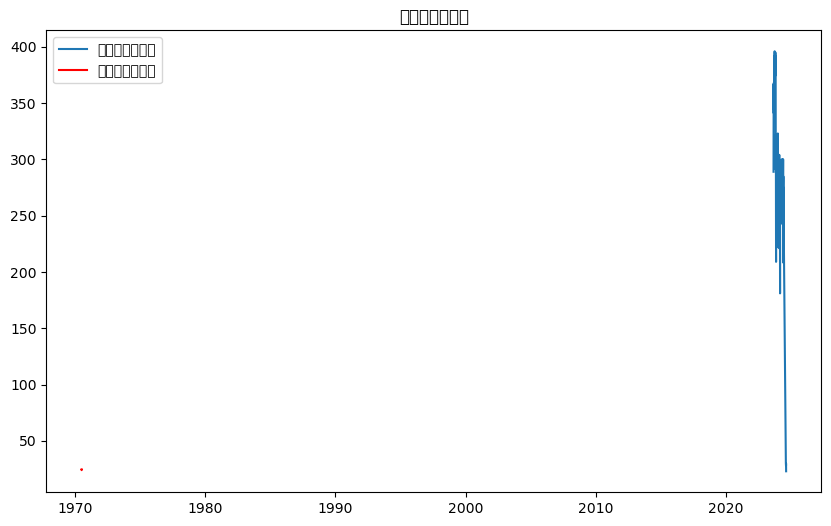

D:\ProgramFiles\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20013 (\N{CJK UNIFIED IDEOGRAPH-4E2D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


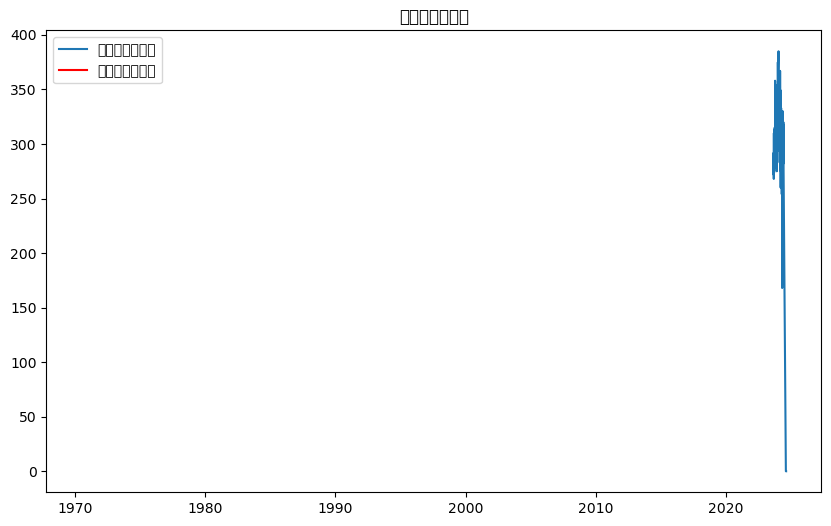

In [6]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# 建立早餐订餐量的 ARIMA 模型 (p=5, d=1, q=0 为例)
breakfast_model = ARIMA(breakfast_df, order=(5, 1, 0))
breakfast_model_fit = breakfast_model.fit()

# 打印模型总结信息
print(breakfast_model_fit.summary())

# 预测未来三天的订餐量
forecast_breakfast = breakfast_model_fit.forecast(steps=3)
print("未来三天早餐订餐量预测：")
print(forecast_breakfast)

# 同样的方法适用于中餐
lunch_model = ARIMA(lunch_df, order=(5, 1, 0))
lunch_model_fit = lunch_model.fit()
forecast_lunch = lunch_model_fit.forecast(steps=3)
print("未来三天中餐订餐量预测：")
print(forecast_lunch)

# 画出历史和预测的图
plt.figure(figsize=(10, 6))
plt.plot(breakfast_df, label='历史早餐订餐量')
plt.plot(forecast_breakfast.index, forecast_breakfast, label='预测早餐订餐量', color='red')
plt.title('早餐订餐量预测')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(lunch_df, label='历史中餐订餐量')
plt.plot(forecast_lunch.index, forecast_lunch, label='预测中餐订餐量', color='red')
plt.title('中餐订餐量预测')
plt.legend()
plt.show()


In [29]:
import pandas as pd

# 读取Excel文件
df = pd.read_excel('data/Served Meal Count.xlsx', usecols=['Date', 'Breakfast Served', 'Lunch Served'])

# 将Date列转换为datetime格式
df['Date'] = pd.to_datetime(df['Date'])

# 生成完整的日期范围
date_range = pd.date_range(start=df['Date'].min(), end=df['Date'].max())

# 将原始DataFrame的索引设置为Date列
df.set_index('Date', inplace=True)

# 重索引到完整的日期范围，缺失的日期行填充为NaN
df_full = df.reindex(date_range)

# 对于缺失值，填充为0
df_full.fillna(0, inplace=True)

# 重置索引，将Date恢复为列
df_full.reset_index(inplace=True)

# 重命名日期列为原来的名字
df_full.rename(columns={'index': 'Date'}, inplace=True)

# 重新计算补齐行的week列，根据日期生成对应的星期几
# 0 表示周一，6 表示周日
df_full['week'] = df_full['Date'].dt.weekday + 1


# 调整列顺序，将 'week' 列放在 'Date' 列后面
cols = ['Date', 'week'] + [col for col in df_full.columns if col not in ['Date', 'week']]
df_full = df_full[cols]
# 结果的df_full就是包含补齐日期和相应week列的DataFrame

In [30]:
df_full

,Date,week,Breakfast Served,Lunch Served,Supper Served
0,2023-08-21,1,289.0,275.0,26.0
1,2023-08-22,2,332.0,272.0,25.0
2,2023-08-23,3,346.0,288.0,26.0
3,2023-08-24,4,366.0,292.0,26.0
4,2023-08-25,5,367.0,284.0,26.0
...,...,...,...,...,...
349,2024-08-04,7,0.0,0.0,0.0
350,2024-08-05,1,28.0,0.0,0.0
351,2024-08-06,2,30.0,0.0,0.0
352,2024-08-07,3,26.0,0.0,0.0


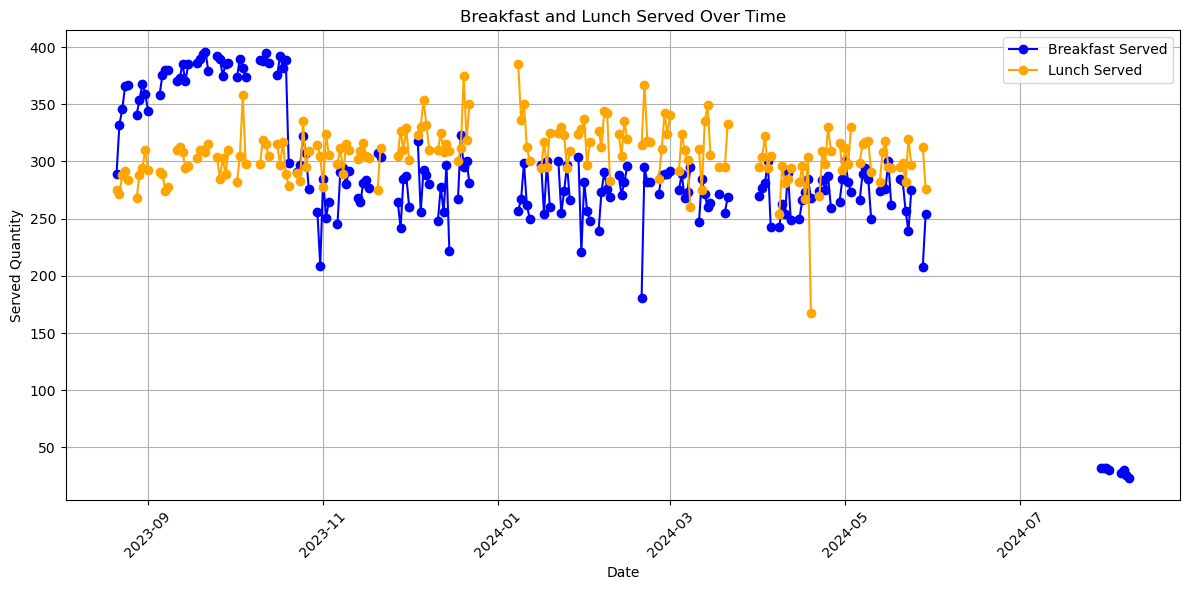

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# 创建副本，替换数值为0的点为NaN
breakfast_plot = df_full['Breakfast Served'].replace(0, np.nan)
lunch_plot = df_full['Lunch Served'].replace(0, np.nan)

# 创建一个图形和坐标轴
plt.figure(figsize=(12, 6))

# 绘制 Breakfast Served 列的折线图
plt.plot(df_full['Date'], breakfast_plot, label='Breakfast Served', color='blue', marker='o')

# 绘制 Lunch Served 列的折线图
plt.plot(df_full['Date'], lunch_plot, label='Lunch Served', color='orange', marker='o')

# 添加标题和标签
plt.title('Breakfast and Lunch Served Over Time')
plt.xlabel('Date')
plt.ylabel('Served Quantity')
plt.xticks(rotation=45)  # 旋转 x 轴标签以便更好地显示
plt.legend()  # 显示图例
plt.grid()  # 添加网格

# 显示图形
plt.tight_layout()  # 调整图形以适应布局
plt.show()


In [32]:
# 只保留早餐订餐量的数据（你可以根据需求对早餐和中餐分别建模）
breakfast_df = df_full[['Date', 'Breakfast Served']].copy()
breakfast_df.set_index('Date', inplace=True)

lunch_df = df_full[['Date', 'Lunch Served']].copy()
lunch_df.set_index('Date', inplace=True)

In [33]:
breakfast_df

,Breakfast Served
Date,
2023-08-21,289.0
2023-08-22,332.0
2023-08-23,346.0
2023-08-24,366.0
2023-08-25,367.0
...,...
2024-08-04,0.0
2024-08-05,28.0
2024-08-06,30.0


D:\ProgramFiles\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
D:\ProgramFiles\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
D:\ProgramFiles\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
D:\ProgramFiles\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:       Breakfast Served   No. Observations:                  354
Model:                ARIMA(50, 1, 0)   Log Likelihood               -2005.777
Date:                Fri, 25 Oct 2024   AIC                           4113.554
Time:                        10:42:45   BIC                           4310.744
Sample:                    08-21-2023   HQIC                          4192.018
                         - 08-08-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4794      0.052     -9.289      0.000      -0.581      -0.378
ar.L2         -0.4949      0.058     -8.461      0.000      -0.610      -0.380
ar.L3         -0.2719      0.061     -4.433      0.0

D:\ProgramFiles\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
D:\ProgramFiles\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
D:\ProgramFiles\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
D:\ProgramFiles\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26089 (\N{CJK UNIFIED IDEOGRAPH-65E9}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\ProgramFiles\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 39184 (\N{CJK UNIFIED IDEOGRAPH-9910}) missing from current font.
  fig.canvas.print

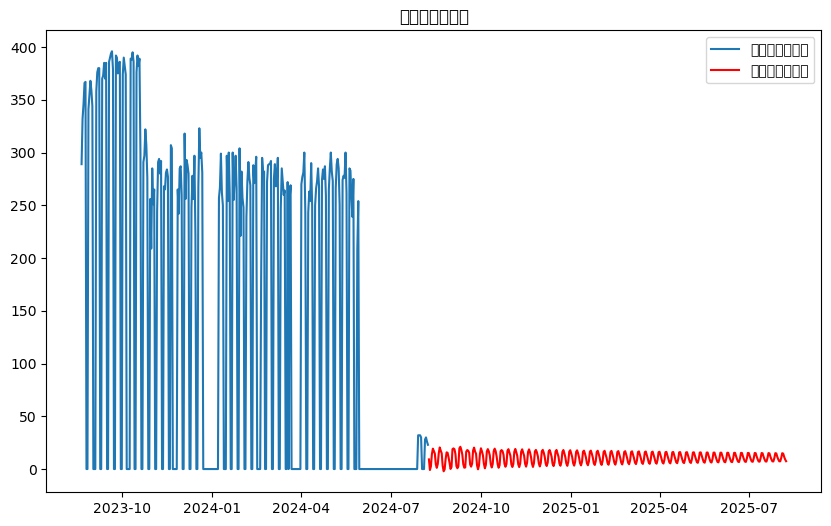

D:\ProgramFiles\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20013 (\N{CJK UNIFIED IDEOGRAPH-4E2D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


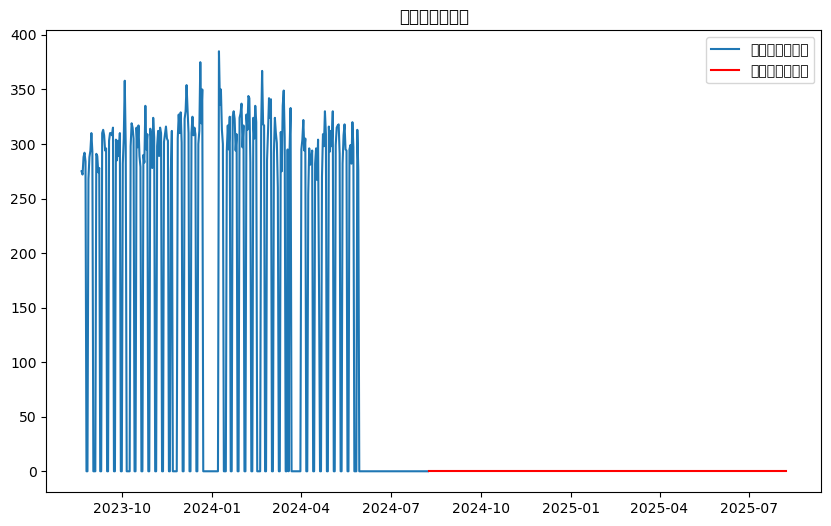

In [37]:
from statsmodels.tsa.arima.model import ARIMA

# 建立早餐订餐量的 ARIMA 模型 (p=5, d=1, q=0 为例)
breakfast_model = ARIMA(breakfast_df, order=(50, 1, 0))
breakfast_model_fit = breakfast_model.fit()

# 打印模型总结信息
print(breakfast_model_fit.summary())

# 预测未来三天的订餐量
forecast_breakfast = breakfast_model_fit.forecast(steps=365)
print("未来三天早餐订餐量预测：")
print(forecast_breakfast)

# 同样的方法适用于中餐
lunch_model = ARIMA(lunch_df, order=(5, 1, 0))
lunch_model_fit = lunch_model.fit()
forecast_lunch = lunch_model_fit.forecast(steps=365)
print("未来三天中餐订餐量预测：")
print(forecast_lunch)

# 画出历史和预测的图
plt.figure(figsize=(10, 6))
plt.plot(breakfast_df, label='历史早餐订餐量')
plt.plot(forecast_breakfast.index, forecast_breakfast, label='预测早餐订餐量', color='red')
plt.title('早餐订餐量预测')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(lunch_df, label='历史中餐订餐量')
plt.plot(forecast_lunch.index, forecast_lunch, label='预测中餐订餐量', color='red')
plt.title('中餐订餐量预测')
plt.legend()
plt.show()


In [48]:
import pandas as pd

# 读取Excel文件
df = pd.read_excel('data/Served Meal Count.xlsx', usecols=['Date', 'Breakfast Served', 'Lunch Served'])

# 将Date列转换为datetime格式
df['Date'] = pd.to_datetime(df['Date'])

# 生成完整的日期范围
date_range = pd.date_range(start=df['Date'].min(), end=df['Date'].max())

# 将原始DataFrame的索引设置为Date列
df.set_index('Date', inplace=True)

# 重索引到完整的日期范围，缺失的日期行填充为NaN
df_full = df.reindex(date_range)

# 对于缺失值，填充为0
df_full.fillna(0, inplace=True)

# # 重置索引，将Date恢复为列
# df_full.reset_index(inplace=True)
#
# # 重命名日期列为原来的名字
# df_full.rename(columns={'index': 'Date'}, inplace=True)

# # 重新计算补齐行的week列，根据日期生成对应的星期几
# # 0 表示周一，6 表示周日
# df_full['week'] = df_full['Date'].dt.weekday + 1
#
#
# # 调整列顺序，将 'week' 列放在 'Date' 列后面
# cols = ['Date', 'week'] + [col for col in df_full.columns if col not in ['Date', 'week']]
# df_full = df_full[cols]
# # 结果的df_full就是包含补齐日期和相应week列的DataFrame
df_full

,Breakfast Served,Lunch Served
2023-08-21,289.0,275.0
2023-08-22,332.0,272.0
2023-08-23,346.0,288.0
2023-08-24,366.0,292.0
2023-08-25,367.0,284.0
...,...,...
2024-08-27,66.0,80.0
2024-08-28,70.0,72.0
2024-08-29,71.0,75.0
2024-08-30,68.0,75.0


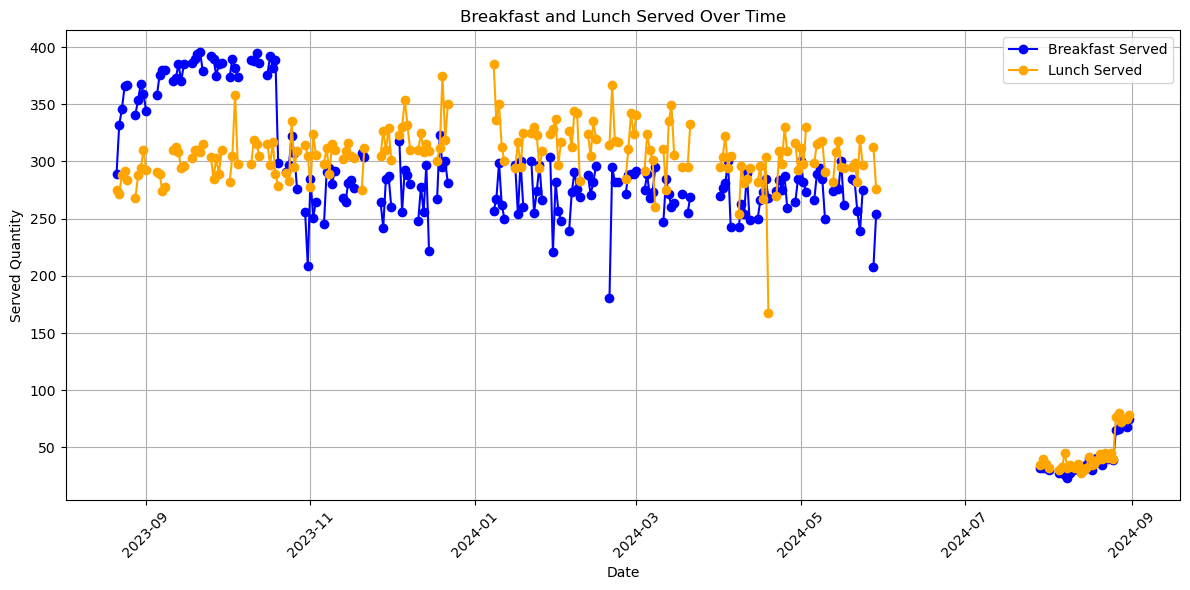

In [49]:
import numpy as np
import matplotlib.pyplot as plt

# 创建副本，替换数值为0的点为NaN
breakfast_plot = df_full['Breakfast Served'].replace(0, np.nan)
lunch_plot = df_full['Lunch Served'].replace(0, np.nan)

# 创建一个图形和坐标轴
plt.figure(figsize=(12, 6))

# 绘制 Breakfast Served 列的折线图
plt.plot(breakfast_plot, label='Breakfast Served', color='blue', marker='o')

# 绘制 Lunch Served 列的折线图
plt.plot(lunch_plot, label='Lunch Served', color='orange', marker='o')

# 添加标题和标签
plt.title('Breakfast and Lunch Served Over Time')
plt.xlabel('Date')
plt.ylabel('Served Quantity')
plt.xticks(rotation=45)  # 旋转 x 轴标签以便更好地显示
plt.legend()  # 显示图例
plt.grid()  # 添加网格

# 显示图形
plt.tight_layout()  # 调整图形以适应布局
plt.show()


In [60]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import holidays
import matplotlib.pyplot as plt

data = df_full

# 生成假期标记（美国）
us_holidays = holidays.US()

# 定义寒暑假日期（示例日期）
winter_break = pd.date_range(start='2023-12-25', end='2024-01-05')
spring_break = pd.date_range(start='2024-03-22', end='2024-03-25')
summer_break = pd.date_range(start='2024-06-03', end='2024-08-31')

# 将寒暑假日期添加到假期标记中
for date in winter_break:
    us_holidays[date] = "Winter Break"
for date in spring_break:
    us_holidays[date] = "Spring Break"
for date in summer_break:
    us_holidays[date] = "Summer Break"

# 添加假期和周末信息
data['Is_Holiday'] = data.index.map(lambda x: 1 if x in us_holidays else 0)
data['Day_of_Week'] = data.index.dayofweek
data['Is_Weekend'] = data['Day_of_Week'].apply(lambda x: 1 if x >= 5 else 0)

# 创建滞后特征
for i in range(1, 8):  # 过去7天的订餐量
    data[f'Breakfast_Lag_{i}'] = data['Breakfast Served'].shift(i)
    data[f'Lunch_Lag_{i}'] = data['Lunch Served'].shift(i)

# 填充缺失值（假设为0）
data.fillna(0, inplace=True)

# 特征选择
features = ['Is_Holiday', 'Is_Weekend', 'Day_of_Week']
features += [f'Breakfast_Lag_{i}' for i in range(1, 8)]
features += [f'Lunch_Lag_{i}' for i in range(1, 8)]

# 分割数据集
X = data[features]
y_breakfast = data['Breakfast Served']
y_lunch = data['Lunch Served']

# 划分数据集并保留原始索引
X_train_breakfast, X_test_breakfast, y_train_breakfast, y_test_breakfast, train_index_breakfast, test_index_breakfast = train_test_split(
    X, y_breakfast, X.index, test_size=0.2, random_state=42
)
X_train_lunch, X_test_lunch, y_train_lunch, y_test_lunch, train_index_lunch, test_index_lunch = train_test_split(
    X, y_lunch, X.index, test_size=0.2, random_state=42
)

In [61]:
X

,Is_Holiday,Is_Weekend,Day_of_Week,Breakfast_Lag_1,Breakfast_Lag_2,Breakfast_Lag_3,Breakfast_Lag_4,Breakfast_Lag_5,Breakfast_Lag_6,Breakfast_Lag_7,Lunch_Lag_1,Lunch_Lag_2,Lunch_Lag_3,Lunch_Lag_4,Lunch_Lag_5,Lunch_Lag_6,Lunch_Lag_7
2023-08-21,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-08-22,0,0,1,289.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-08-23,0,0,2,332.0,289.0,0.0,0.0,0.0,0.0,0.0,272.0,275.0,0.0,0.0,0.0,0.0,0.0
2023-08-24,0,0,3,346.0,332.0,289.0,0.0,0.0,0.0,0.0,288.0,272.0,275.0,0.0,0.0,0.0,0.0
2023-08-25,0,0,4,366.0,346.0,332.0,289.0,0.0,0.0,0.0,292.0,288.0,272.0,275.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-27,1,0,1,65.0,39.0,42.0,40.0,41.0,35.0,39.0,77.0,40.0,45.0,41.0,45.0,40.0,44.0
2024-08-28,1,0,2,66.0,65.0,39.0,42.0,40.0,41.0,35.0,80.0,77.0,40.0,45.0,41.0,45.0,40.0
2024-08-29,1,0,3,70.0,66.0,65.0,39.0,42.0,40.0,41.0,72.0,80.0,77.0,40.0,45.0,41.0,45.0
2024-08-30,1,0,4,71.0,70.0,66.0,65.0,39.0,42.0,40.0,75.0,72.0,80.0,77.0,40.0,45.0,41.0


In [62]:
X_train_breakfast

,Is_Holiday,Is_Weekend,Day_of_Week,Breakfast_Lag_1,Breakfast_Lag_2,Breakfast_Lag_3,Breakfast_Lag_4,Breakfast_Lag_5,Breakfast_Lag_6,Breakfast_Lag_7,Lunch_Lag_1,Lunch_Lag_2,Lunch_Lag_3,Lunch_Lag_4,Lunch_Lag_5,Lunch_Lag_6,Lunch_Lag_7
2024-01-05,1,0,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-11-30,0,0,3,285.0,242.0,265.0,0.0,0.0,0.0,0.0,310.0,327.0,305.0,0.0,0.0,0.0,0.0
2024-08-09,1,0,4,23.0,26.0,30.0,28.0,0.0,0.0,0.0,32.0,45.0,33.0,30.0,0.0,0.0,0.0
2024-03-04,0,0,0,0.0,0.0,292.0,289.0,289.0,288.0,272.0,0.0,0.0,341.0,324.0,342.0,311.0,285.0
2024-03-30,0,1,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-31,0,0,1,256.0,0.0,0.0,276.0,307.0,322.0,297.0,314.0,0.0,0.0,309.0,295.0,335.0,283.0
2023-12-05,0,0,1,318.0,0.0,0.0,260.0,287.0,285.0,242.0,323.0,0.0,0.0,301.0,329.0,310.0,327.0
2024-05-17,0,0,4,300.0,276.0,278.0,274.0,0.0,0.0,250.0,295.0,318.0,308.0,282.0,0.0,0.0,291.0
2024-08-03,1,1,5,0.0,30.0,32.0,32.0,32.0,0.0,0.0,0.0,32.0,36.0,40.0,35.0,0.0,0.0


In [63]:
y_train_breakfast

2024-01-05      0.0
2023-11-30    287.0
2024-08-09     28.0
2024-03-04    275.0
2024-03-30      0.0
              ...  
2023-10-31    209.0
2023-12-05    256.0
2024-05-17    262.0
2024-08-03      0.0
2023-12-01    260.0
Name: Breakfast Served, Length: 301, dtype: float64

In [64]:
# 使用随机森林回归模型
breakfast_model = RandomForestRegressor(n_estimators=100, random_state=42)
lunch_model = RandomForestRegressor(n_estimators=100, random_state=42)

# 模型训练
breakfast_model.fit(X_train_breakfast, y_train_breakfast)
lunch_model.fit(X_train_lunch, y_train_lunch)

# 模型推理
pred_train_breakfast = breakfast_model.predict(X_train_breakfast)
pred_train_lunch = lunch_model.predict(X_train_lunch)

pred_test_breakfast = breakfast_model.predict(X_test_breakfast)
pred_test_lunch = lunch_model.predict(X_test_lunch)

pred_breakfast = breakfast_model.predict(X)
pred_lunch = lunch_model.predict(X)

In [65]:
y_breakfast

2023-08-21    289.0
2023-08-22    332.0
2023-08-23    346.0
2023-08-24    366.0
2023-08-25    367.0
              ...  
2024-08-27     66.0
2024-08-28     70.0
2024-08-29     71.0
2024-08-30     68.0
2024-08-31     75.0
Freq: D, Name: Breakfast Served, Length: 377, dtype: float64

In [66]:
pred_breakfast

array([5.73045703e+01, 2.83410000e+02, 3.22650000e+02, 3.10360000e+02,
       2.98600000e+02, 1.27700000e+01, 0.00000000e+00, 2.91770000e+02,
       3.39450000e+02, 3.60470000e+02, 3.64240000e+02, 3.47210000e+02,
       2.43000000e+00, 6.35000000e+00, 1.54400000e+01, 3.54210000e+02,
       3.71780000e+02, 3.78670000e+02, 3.64460000e+02, 2.66700000e+01,
       7.40000000e+00, 2.78376838e+02, 3.67380000e+02, 3.79680000e+02,
       3.70280000e+02, 3.50420000e+02, 3.67000000e+00, 6.70000000e+00,
       3.82570000e+02, 3.89120000e+02, 3.81270000e+02, 3.78180000e+02,
       3.59650000e+02, 9.68000000e+00, 1.85000000e+01, 3.82660000e+02,
       3.78600000e+02, 3.78290000e+02, 3.78420000e+02, 3.63430000e+02,
       0.00000000e+00, 2.85500000e+01, 3.66870000e+02, 3.78950000e+02,
       3.79960000e+02, 3.66830000e+02, 3.37880000e+02, 0.00000000e+00,
       3.19000000e+01, 3.41000000e+00, 3.60090000e+02, 3.80060000e+02,
       3.82700000e+02, 3.43760000e+02, 2.07100000e+01, 1.85000000e+01,
      

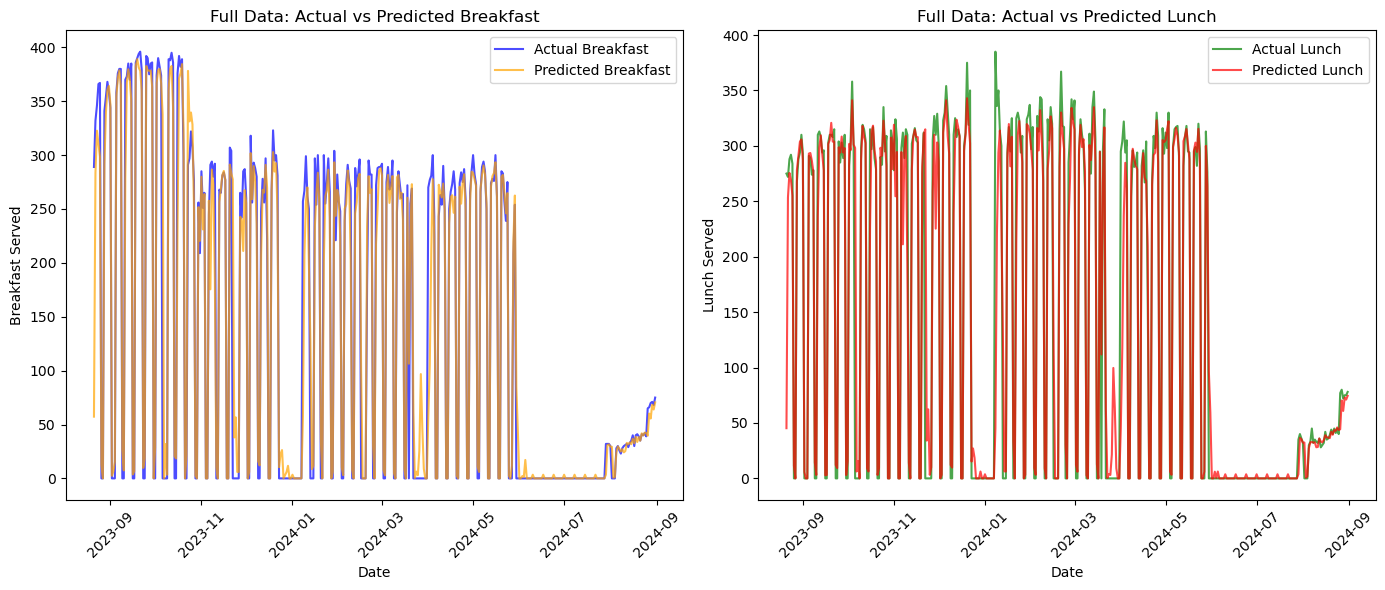

In [67]:
# 使用完整数据集进行预测

# 绘制未划分数据集的真实标签与预测标签对比
plt.figure(figsize=(14, 6))

# 早餐：完整数据集的真实值与预测值对比
plt.subplot(1, 2, 1)
plt.plot(data.index, y_breakfast, label='Actual Breakfast', color='blue', alpha=0.7)
plt.plot(data.index, pred_breakfast, label='Predicted Breakfast', color='orange', alpha=0.7)
plt.title('Full Data: Actual vs Predicted Breakfast')
plt.xlabel('Date')
plt.ylabel('Breakfast Served')
plt.legend()
plt.xticks(rotation=45)

# 午餐：完整数据集的真实值与预测值对比
plt.subplot(1, 2, 2)
plt.plot(data.index, y_lunch, label='Actual Lunch', color='green', alpha=0.7)
plt.plot(data.index, pred_lunch, label='Predicted Lunch', color='red', alpha=0.7)
plt.title('Full Data: Actual vs Predicted Lunch')
plt.xlabel('Date')
plt.ylabel('Lunch Served')
plt.legend()
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


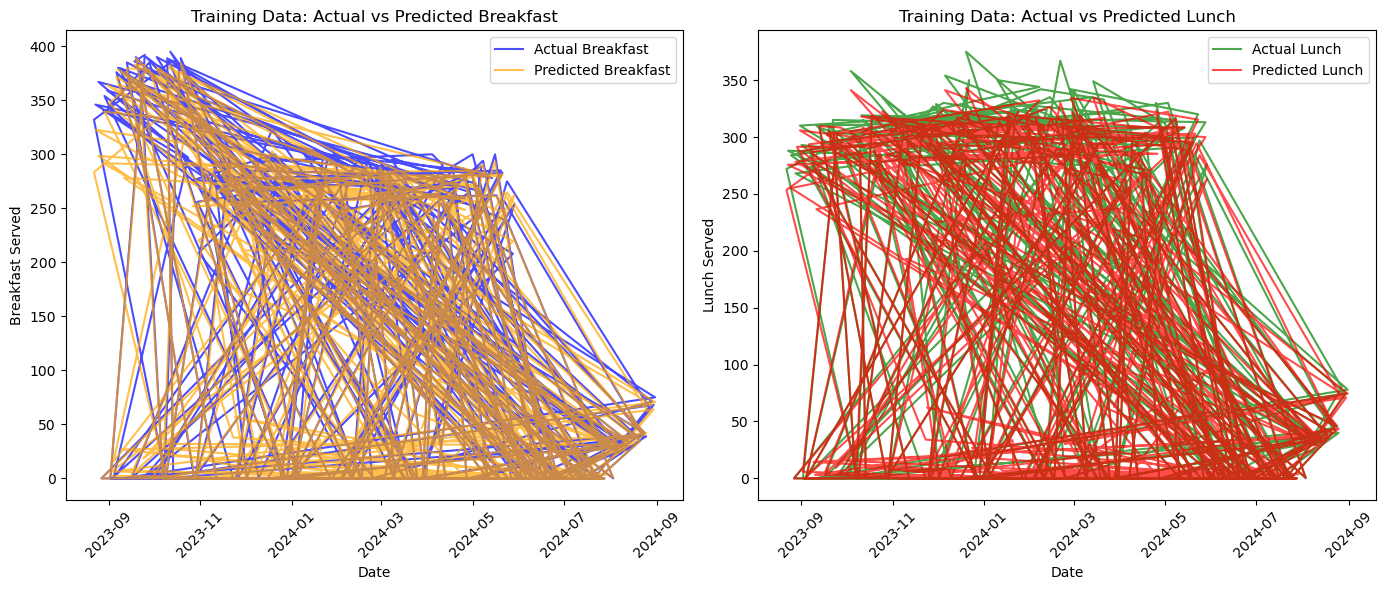

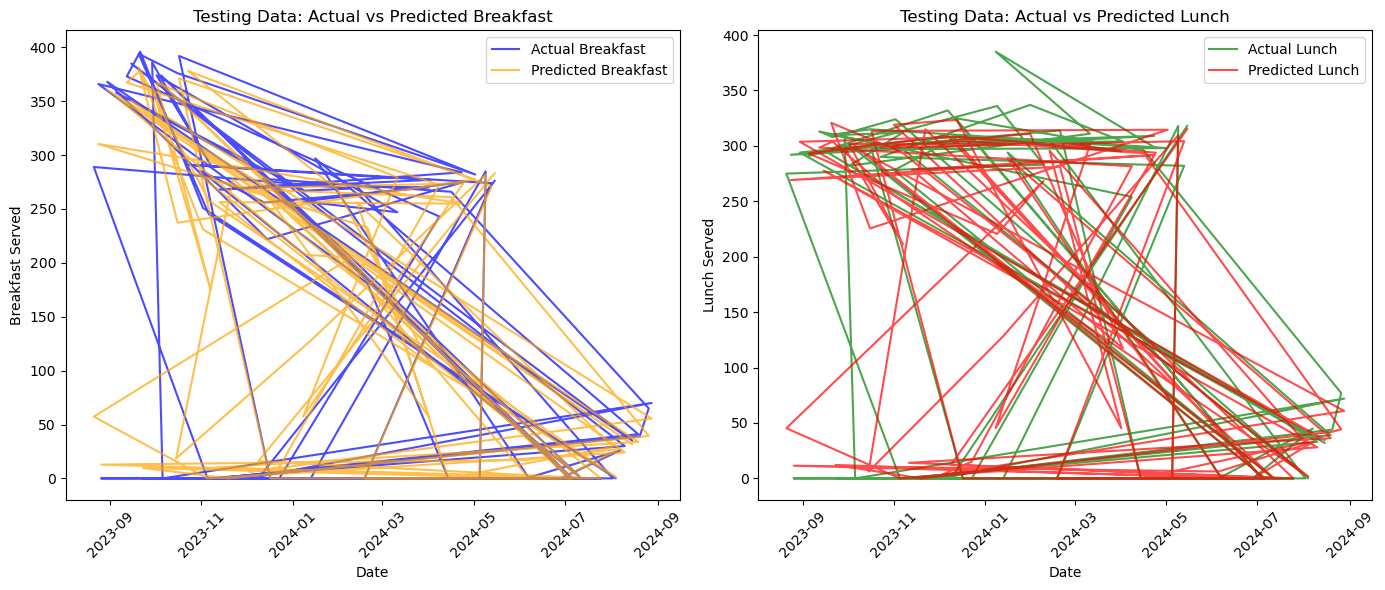

In [68]:
# 绘制训练数据的真实标签与预测标签对比
plt.figure(figsize=(14, 6))

# 早餐：训练数据真实与预测值对比
plt.subplot(1, 2, 1)
plt.plot(train_index_breakfast, y_train_breakfast, label='Actual Breakfast', color='blue', alpha=0.7)
plt.plot(train_index_breakfast,pred_train_breakfast, label='Predicted Breakfast', color='orange', alpha=0.7)
plt.title('Training Data: Actual vs Predicted Breakfast')
plt.xlabel('Date')
plt.ylabel('Breakfast Served')
plt.legend()
plt.xticks(rotation=45)

# 午餐：训练数据真实与预测值对比
plt.subplot(1, 2, 2)
plt.plot(train_index_lunch, y_train_lunch, label='Actual Lunch', color='green', alpha=0.7)
plt.plot(train_index_lunch, pred_train_lunch, label='Predicted Lunch', color='red', alpha=0.7)
plt.title('Training Data: Actual vs Predicted Lunch')
plt.xlabel('Date')
plt.ylabel('Lunch Served')
plt.legend()
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# 绘制测试数据的真实标签与预测标签对比
plt.figure(figsize=(14, 6))

# 早餐：测试数据真实与预测值对比
plt.subplot(1, 2, 1)
plt.plot(test_index_breakfast, y_test_breakfast, label='Actual Breakfast', color='blue', alpha=0.7)
plt.plot(test_index_breakfast, pred_test_breakfast, label='Predicted Breakfast', color='orange', alpha=0.7)
plt.title('Testing Data: Actual vs Predicted Breakfast')
plt.xlabel('Date')
plt.ylabel('Breakfast Served')
plt.legend()
plt.xticks(rotation=45)

# 午餐：测试数据真实与预测值对比
plt.subplot(1, 2, 2)
plt.plot(test_index_lunch, y_test_lunch, label='Actual Lunch', color='green', alpha=0.7)
plt.plot(test_index_lunch, pred_test_lunch, label='Predicted Lunch', color='red', alpha=0.7)
plt.title('Testing Data: Actual vs Predicted Lunch')
plt.xlabel('Date')
plt.ylabel('Lunch Served')
plt.legend()
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Breakfast MSE: 5870.2066743772275
Lunch MSE: 6831.952932614643
Breakfast MAE: 36.8820541855805
Lunch MAE: 36.54006748916289
Breakfast R² Score: 0.7433504492419134
Lunch R² Score: 0.6902742582733703


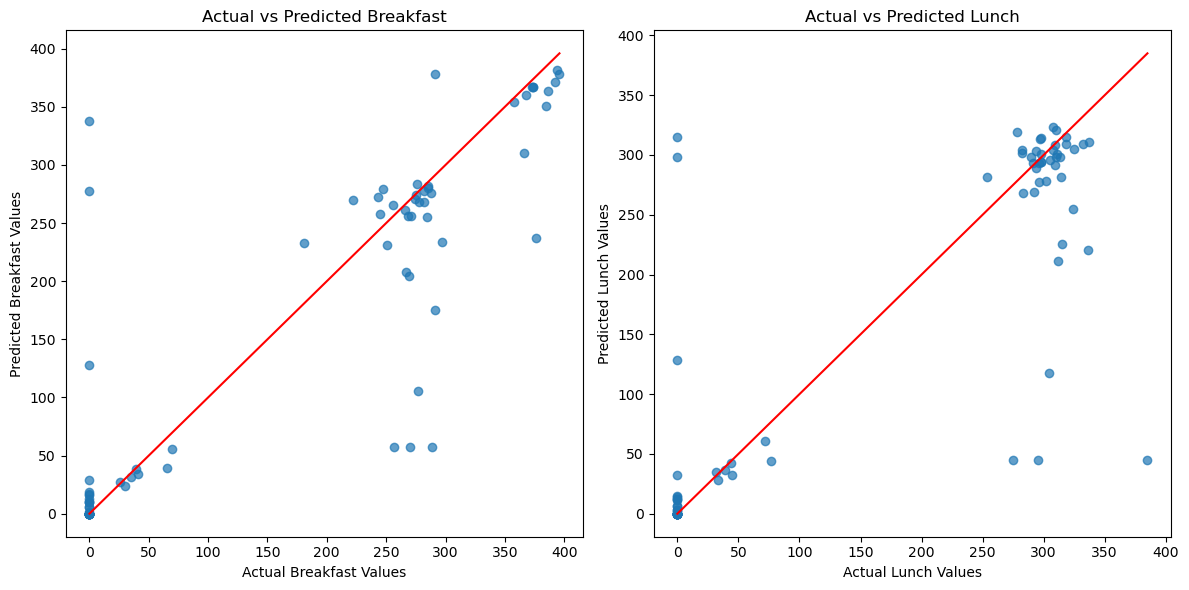

In [69]:

# 模型性能评估
breakfast_mse = mean_squared_error(y_test_breakfast, pred_test_breakfast)
lunch_mse = mean_squared_error(y_test_lunch, pred_test_lunch)
breakfast_mae = mean_absolute_error(y_test_breakfast, pred_test_breakfast)
lunch_mae = mean_absolute_error(y_test_lunch, pred_test_lunch)
breakfast_r2 = r2_score(y_test_breakfast, pred_test_breakfast)
lunch_r2 = r2_score(y_test_lunch, pred_test_lunch)

print(f'Breakfast MSE: {breakfast_mse}')
print(f'Lunch MSE: {lunch_mse}')
print(f'Breakfast MAE: {breakfast_mae}')
print(f'Lunch MAE: {lunch_mae}')
print(f'Breakfast R² Score: {breakfast_r2}')
print(f'Lunch R² Score: {lunch_r2}')

# 可视化评估
plt.figure(figsize=(12, 6))

# 散点图
plt.subplot(1, 2, 1)
plt.scatter(y_test_breakfast, pred_test_breakfast, alpha=0.7)
plt.xlabel('Actual Breakfast Values')
plt.ylabel('Predicted Breakfast Values')
plt.title('Actual vs Predicted Breakfast')
plt.plot([y_test_breakfast.min(), y_test_breakfast.max()],
         [y_test_breakfast.min(), y_test_breakfast.max()], color='red')  # 理想预测线

plt.subplot(1, 2, 2)
plt.scatter(y_test_lunch, pred_test_lunch, alpha=0.7)
plt.xlabel('Actual Lunch Values')
plt.ylabel('Predicted Lunch Values')
plt.title('Actual vs Predicted Lunch')
plt.plot([y_test_lunch.min(), y_test_lunch.max()],
         [y_test_lunch.min(), y_test_lunch.max()], color='red')  # 理想预测线

plt.tight_layout()
plt.show()

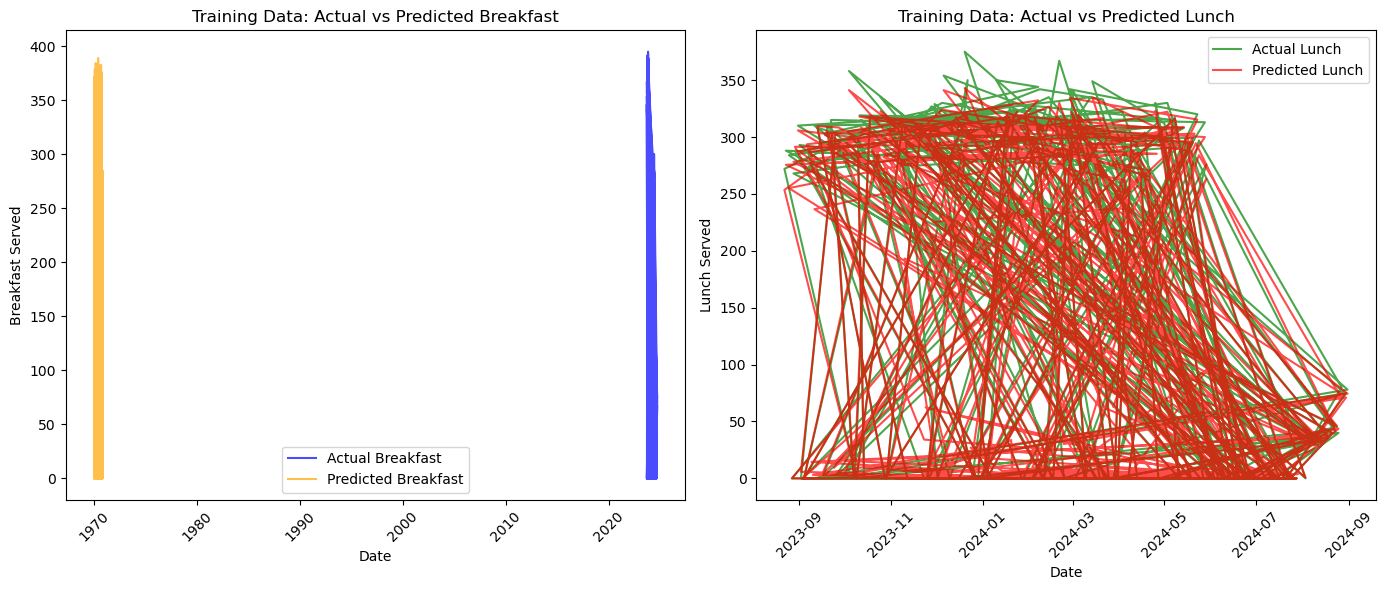

In [70]:

# 未来一周的预测
future_dates = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=30)
future_data = pd.DataFrame(index=future_dates)

# 添加假期和周末信息
future_data['Is_Holiday'] = future_data.index.map(lambda x: 1 if x in us_holidays else 0)
future_data['Day_of_Week'] = future_data.index.dayofweek
future_data['Is_Weekend'] = future_data['Day_of_Week'].apply(lambda x: 1 if x >= 5 else 0)

# 添加滞后特征
for i in range(1, 8):
    future_data[f'Breakfast_Lag_{i}'] = data['Breakfast Served'].iloc[-i] if len(data) >= i else 0
    future_data[f'Lunch_Lag_{i}'] = data['Lunch Served'].iloc[-i] if len(data) >= i else 0

# 使用模型进行预测
future_data[features] = future_data[features].fillna(0)
future_data['Predicted_Breakfast'] = breakfast_model.predict(future_data[features])
future_data['Predicted_Lunch'] = lunch_model.predict(future_data[features])

print(future_data[['Predicted_Breakfast', 'Predicted_Lunch']])


            Predicted_Breakfast  Predicted_Lunch
2024-09-01                67.06            73.93
2024-09-02                60.62            66.68
2024-09-03                83.55            87.48
2024-09-04                82.83            84.81
2024-09-05                79.92            81.96
2024-09-06                70.58            78.74
2024-09-07                67.06            74.31
2024-09-08                67.06            73.93
2024-09-09                94.55            99.18
2024-09-10                83.55            87.48
2024-09-11                82.83            84.81
2024-09-12                79.92            81.96
2024-09-13                70.58            78.74
2024-09-14                67.06            74.31
2024-09-15                67.06            73.93
2024-09-16                94.55            99.18
2024-09-17                83.55            87.48
2024-09-18                82.83            84.81
2024-09-19                79.92            81.96
2024-09-20          